In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
class RegModel:
    def __init__(self, data: np.array, labels: np.array, learning_rate = 0.1, reg_rate=0.01, set_divide=(0.7, 0.2, 0.1)):
        assert len(labels) == len(data), 'Sizes of Labels and Train Data must match'
        p = np.random.permutation(len(data))
        data = data[p]
        labels = labels[p]
        
        # Normalize Data
        data = (data - data.mean()) / data.std()
        labels = (labels - labels.mean()) / labels.std()
        
        self.num_vars = data.shape[1]
        self.l = learning_rate
        self.reg_rate = reg_rate
        
        self.train_set = data[0: int(set_divide[0] * len(data))]
        self.train_labels = labels[0: int(set_divide[0] * len(data))]
        
        self.validation_set = data[int(set_divide[0] * len(data)): int((set_divide[0] + set_divide[1]) * len(data))]
        self.validation_labels = labels[int(set_divide[0] * len(data)): int((set_divide[0] + set_divide[1]) * len(data))]
        
        self.test_set = data[int((set_divide[0] + set_divide[1]) * len(data)):]
        self.test_labels = labels[int((set_divide[0] + set_divide[1]) * len(data)):]
        
        self.initialize_weights()
        
    def initialize_weights(self, feature_engineering=False):
        if feature_engineering:
            # Feature Engineering
            pass
        self.weights = np.random.normal(size=(self.num_vars, 1))
        self.bias = np.zeros((1,1))
    
    def parameter_tuning(self):
        reg_rates = np.arange(0, 0.2, 0.02)
        for rate in reg_rates:
            fig = plt.figure()
            self.initialize_weights()
            his1, his2 = self.epoch(6, False, True, rate)
            plt.title(f'REG_RATE = {round(rate, 2)}')
            plt.plot(range(0, len(his1)), his1, color='r')
            plt.plot(range(0, len(his2)), his2, color='b')
            
    
    def _get_loss(self, results, labels, reg=False):
        if reg:
            return (np.sum(np.square(results - labels)) + self.reg_rate*np.sum(self.weights))/ len(results)  
        return np.sum(np.square(results - labels)) / len(results)
    
    def _run_model(self, data):
        return np.dot(data, self.weights) + self.bias
    
    def _update_weights(self, predicted, labels, inputs, reg=False):
        if reg:
            self.weights -= self.l * (2 / len(labels) * np.sum(inputs * (predicted - labels))) + self.reg_rate * self.weights
            self.bias -= self.l * (2/len(labels) * np.sum(predicted - labels))
            return
        self.weights -= self.l * (2 / len(labels) * np.sum(inputs * (predicted - labels)))
        self.bias -= self.l * (2/len(labels) * np.sum(predicted - labels))
        
    def epoch(self, num_epochs, verbose=True, reg=False, reg_rate=0.01):
        his = []
        his2 = []
        self.reg_rate = reg_rate
        for i in range(num_epochs):
            pred = self._run_model(self.train_set)
            loss = self._get_loss(pred, self.train_labels, reg)
            if verbose:
                print(f'[+] Epoch {i}: Loss = {round(loss, 2)}')
            else:
                his2.append(self.test_model(True, False, True))
            his.append(loss)
            self._update_weights(pred, self.train_labels, self.train_set, reg)
        return his, his2
    
    def test_model(self, validation=False, verbose=True, reg=False):
        if validation:
            pred = self._run_model(self.validation_set)
            loss = self._get_loss(pred, self.validation_labels, reg)
        else:
            pred = self._run_model(self.test_set)
            loss = self._get_loss(pred, self.test_labels, reg)
        
        if verbose:
            print(f'[+] Loss in Test Set = {round(loss, 2)}')
        return loss
    
    def predict(self, inputs):
        return self._run_model(inputs)

In [28]:
data = np.load('ProcessedData/WeatherConditions/train_data.npy')
labels = np.load('ProcessedData/WeatherConditions/labels.npy')
labels = np.reshape(labels, (labels.shape[0], 1))

In [80]:
model = RegModel(data, labels)

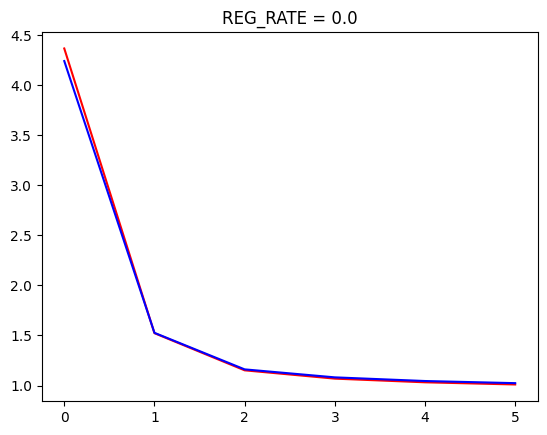

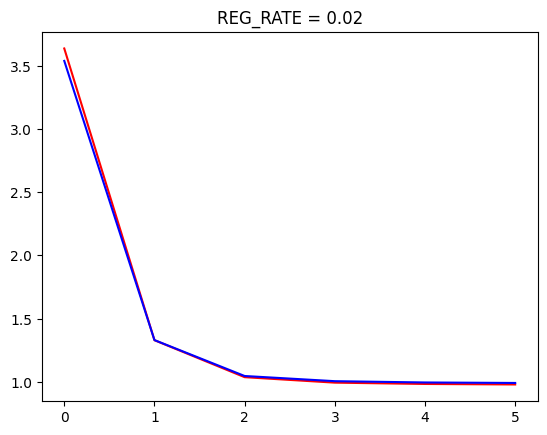

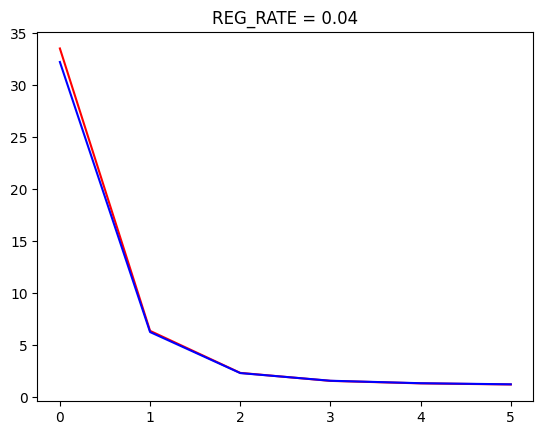

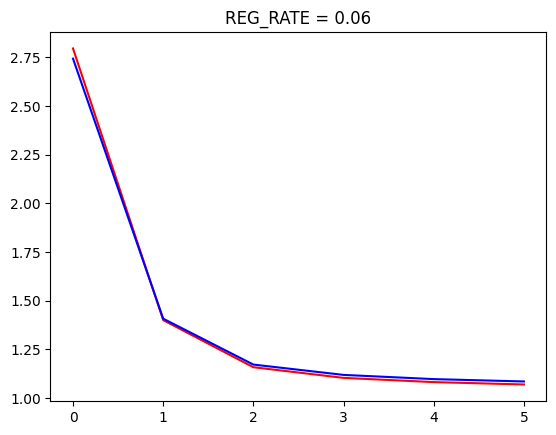

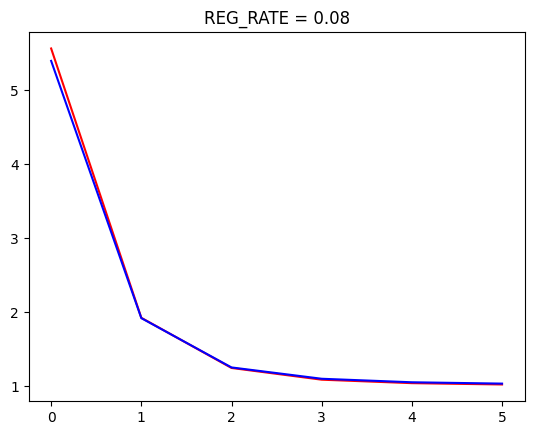

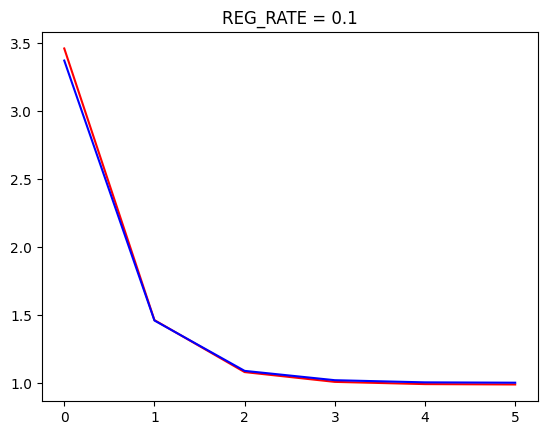

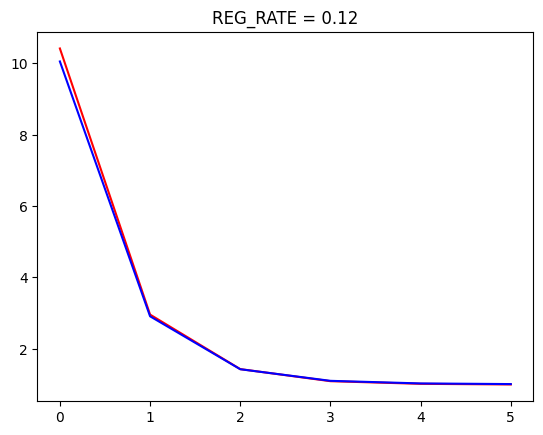

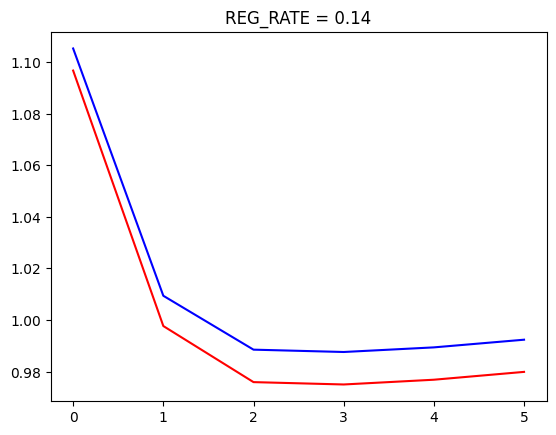

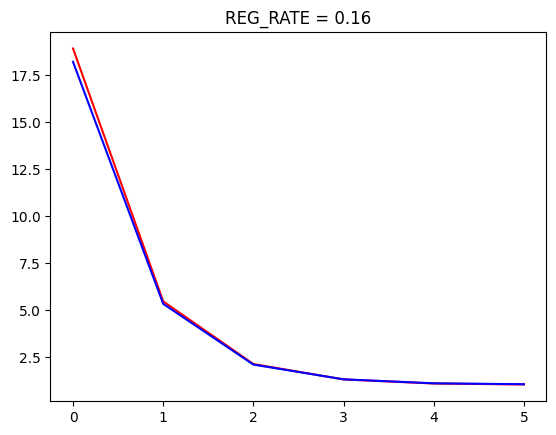

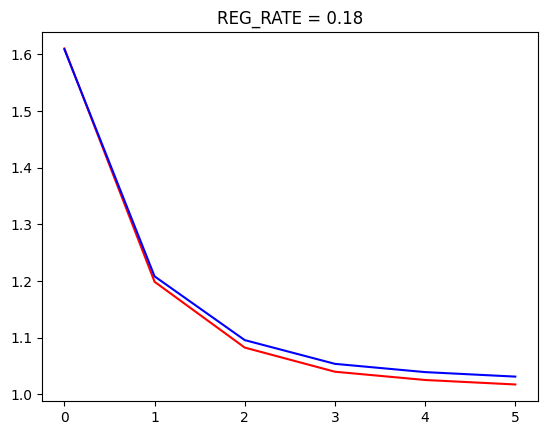

In [81]:
model.parameter_tuning()

In [57]:
model.test_model()

[+] Loss in Test Set = 1.23


In [62]:
figure = plt.figure()

<Figure size 640x480 with 0 Axes>

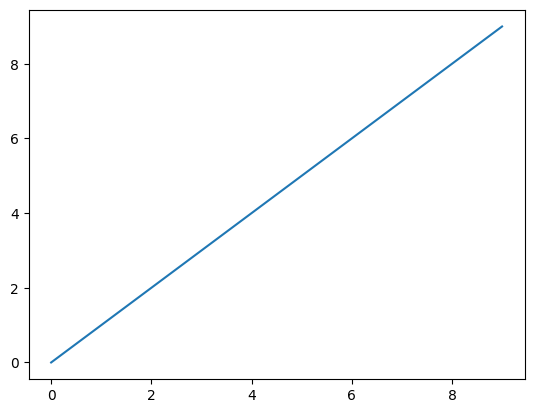

In [64]:
plt.plot(range(10), range(10))

In [78]:
print(np.arange(0, 0.2, 0.02))

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]
